In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import svm,tree
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading Csv file
df = pd.read_csv('carInsurance_train.csv',index_col = 'Id')

In [3]:
# Top rows
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


### EXPLORATORY DATA ANALYSIS

In [4]:
# Shape of dataframe
df.shape

(4000, 18)

In [5]:
# Columns in dataset
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               3981 non-null   object
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           958 non-null    object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [7]:
# Statistics of numerical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4000.0,NaN,NaN,NaN,41.21475,11.550194,18.0,32.0,39.0,49.0,95.0
Job,3981,11,management,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital,4000,3,married,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,3831,3,secondary,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Default,4000.0,NaN,NaN,NaN,0.0145,0.119555,0.0,0.0,0.0,0.0,1.0
Balance,4000.0,NaN,NaN,NaN,1532.93725,3511.452489,-3058.0,111.0,551.5,1619.0,98417.0
HHInsurance,4000.0,NaN,NaN,NaN,0.49275,0.50001,0.0,0.0,0.0,1.0,1.0
CarLoan,4000.0,NaN,NaN,NaN,0.133,0.339617,0.0,0.0,0.0,0.0,1.0
Communication,3098,2,cellular,2831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastContactDay,4000.0,NaN,NaN,NaN,15.72125,8.425307,1.0,8.0,16.0,22.0,31.0


In [8]:
# Datatypes of columns in dataset
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [9]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

### Data Visual Analysis

In [10]:
# checking unique values
for i in df.columns:
    print(i,':',df[i].nunique())

Age : 70
Job : 11
Marital : 3
Education : 3
Default : 2
Balance : 2178
HHInsurance : 2
CarLoan : 2
Communication : 2
LastContactDay : 31
LastContactMonth : 12
NoOfContacts : 35
DaysPassed : 330
PrevAttempts : 20
Outcome : 3
CallStart : 3777
CallEnd : 3764
CarInsurance : 2


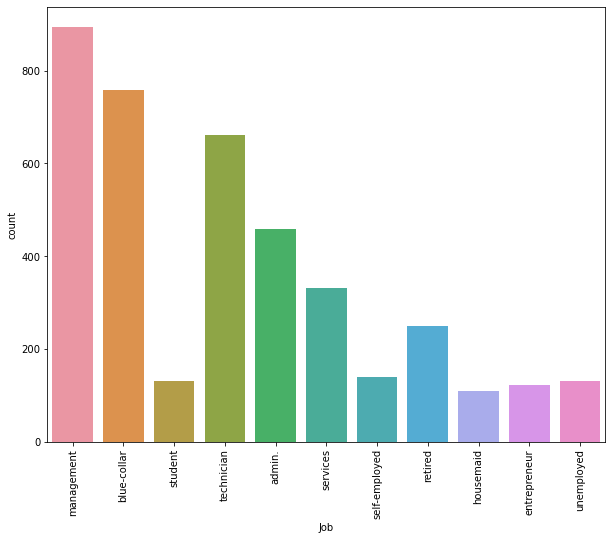

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='Job',data=df)
plt.xticks(rotation=90)
plt.show()

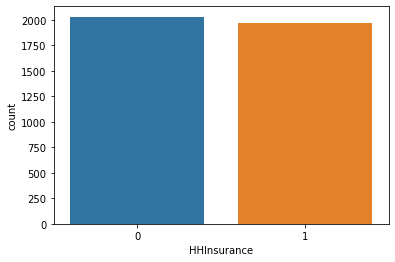

In [12]:
sns.countplot(x='HHInsurance',data=df)
plt.show()

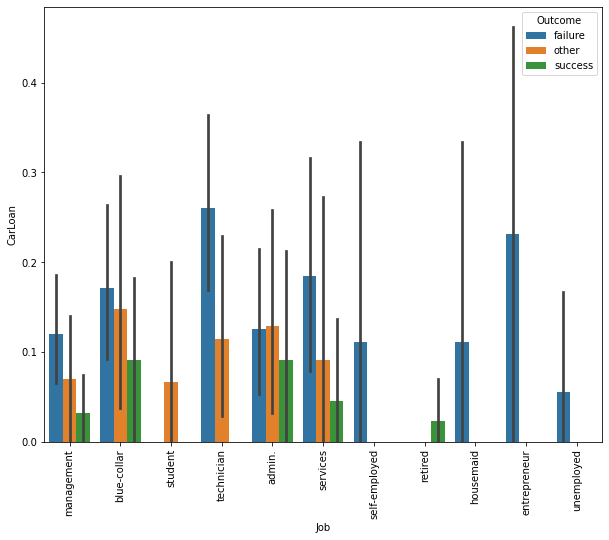

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x='Job',y='CarLoan',hue='Outcome',data=df)
plt.xticks(rotation=90)
plt.show()

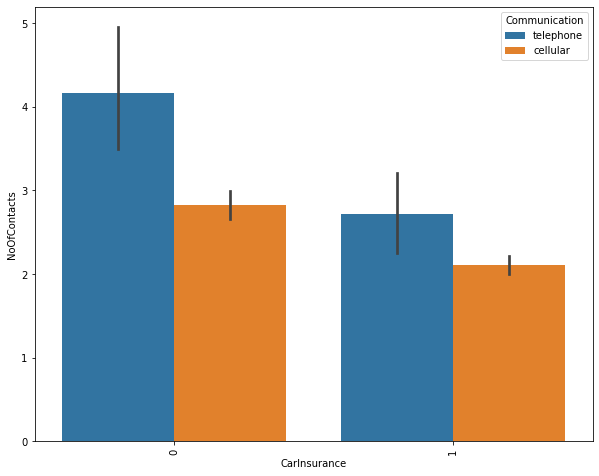

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x='CarInsurance',y='NoOfContacts',hue='Communication',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Education'>

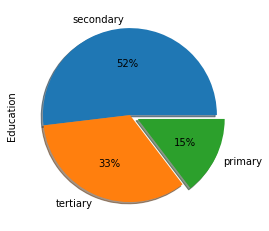

In [15]:
df['Education'].value_counts().plot.pie(explode=(0,0,0.1),autopct='%.f%%',shadow=True)

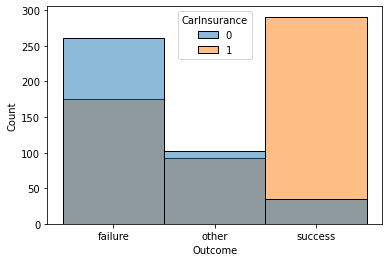

In [16]:
sns.histplot(x='Outcome',data=df,hue='CarInsurance')
plt.show()

<AxesSubplot:ylabel='Outcome'>

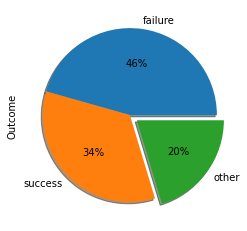

In [17]:
df['Outcome'].value_counts().plot.pie(explode=(0,0,0.1),autopct='%.f%%',shadow=True)

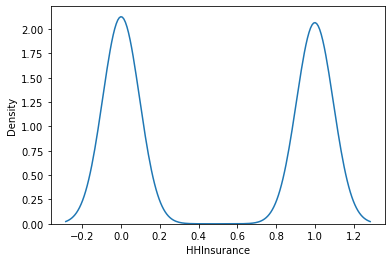

In [18]:
sns.kdeplot(x='HHInsurance',data=df)
plt.show()

<AxesSubplot:ylabel='CarInsurance'>

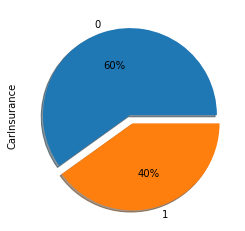

In [19]:
df['CarInsurance'].value_counts().plot.pie(explode=(0,0.1),autopct='%.f%%',shadow=True)

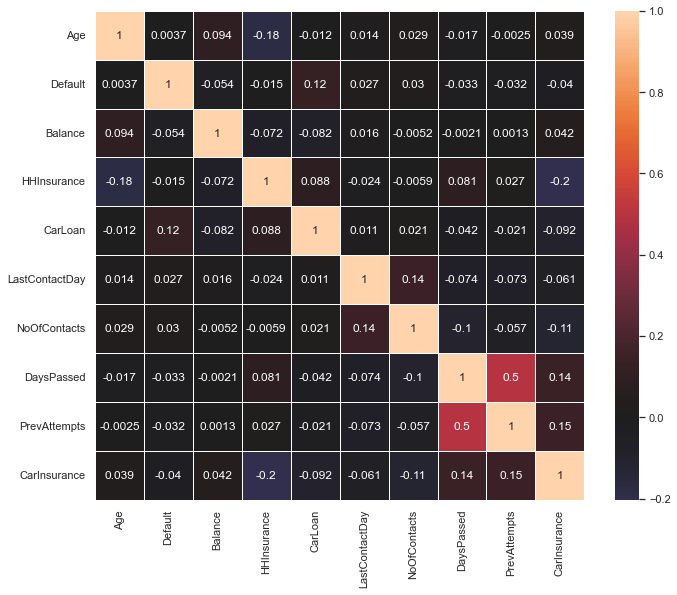

In [73]:
#Heatmap
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,annot=True,center=0,
            square=True, linewidths=.5);

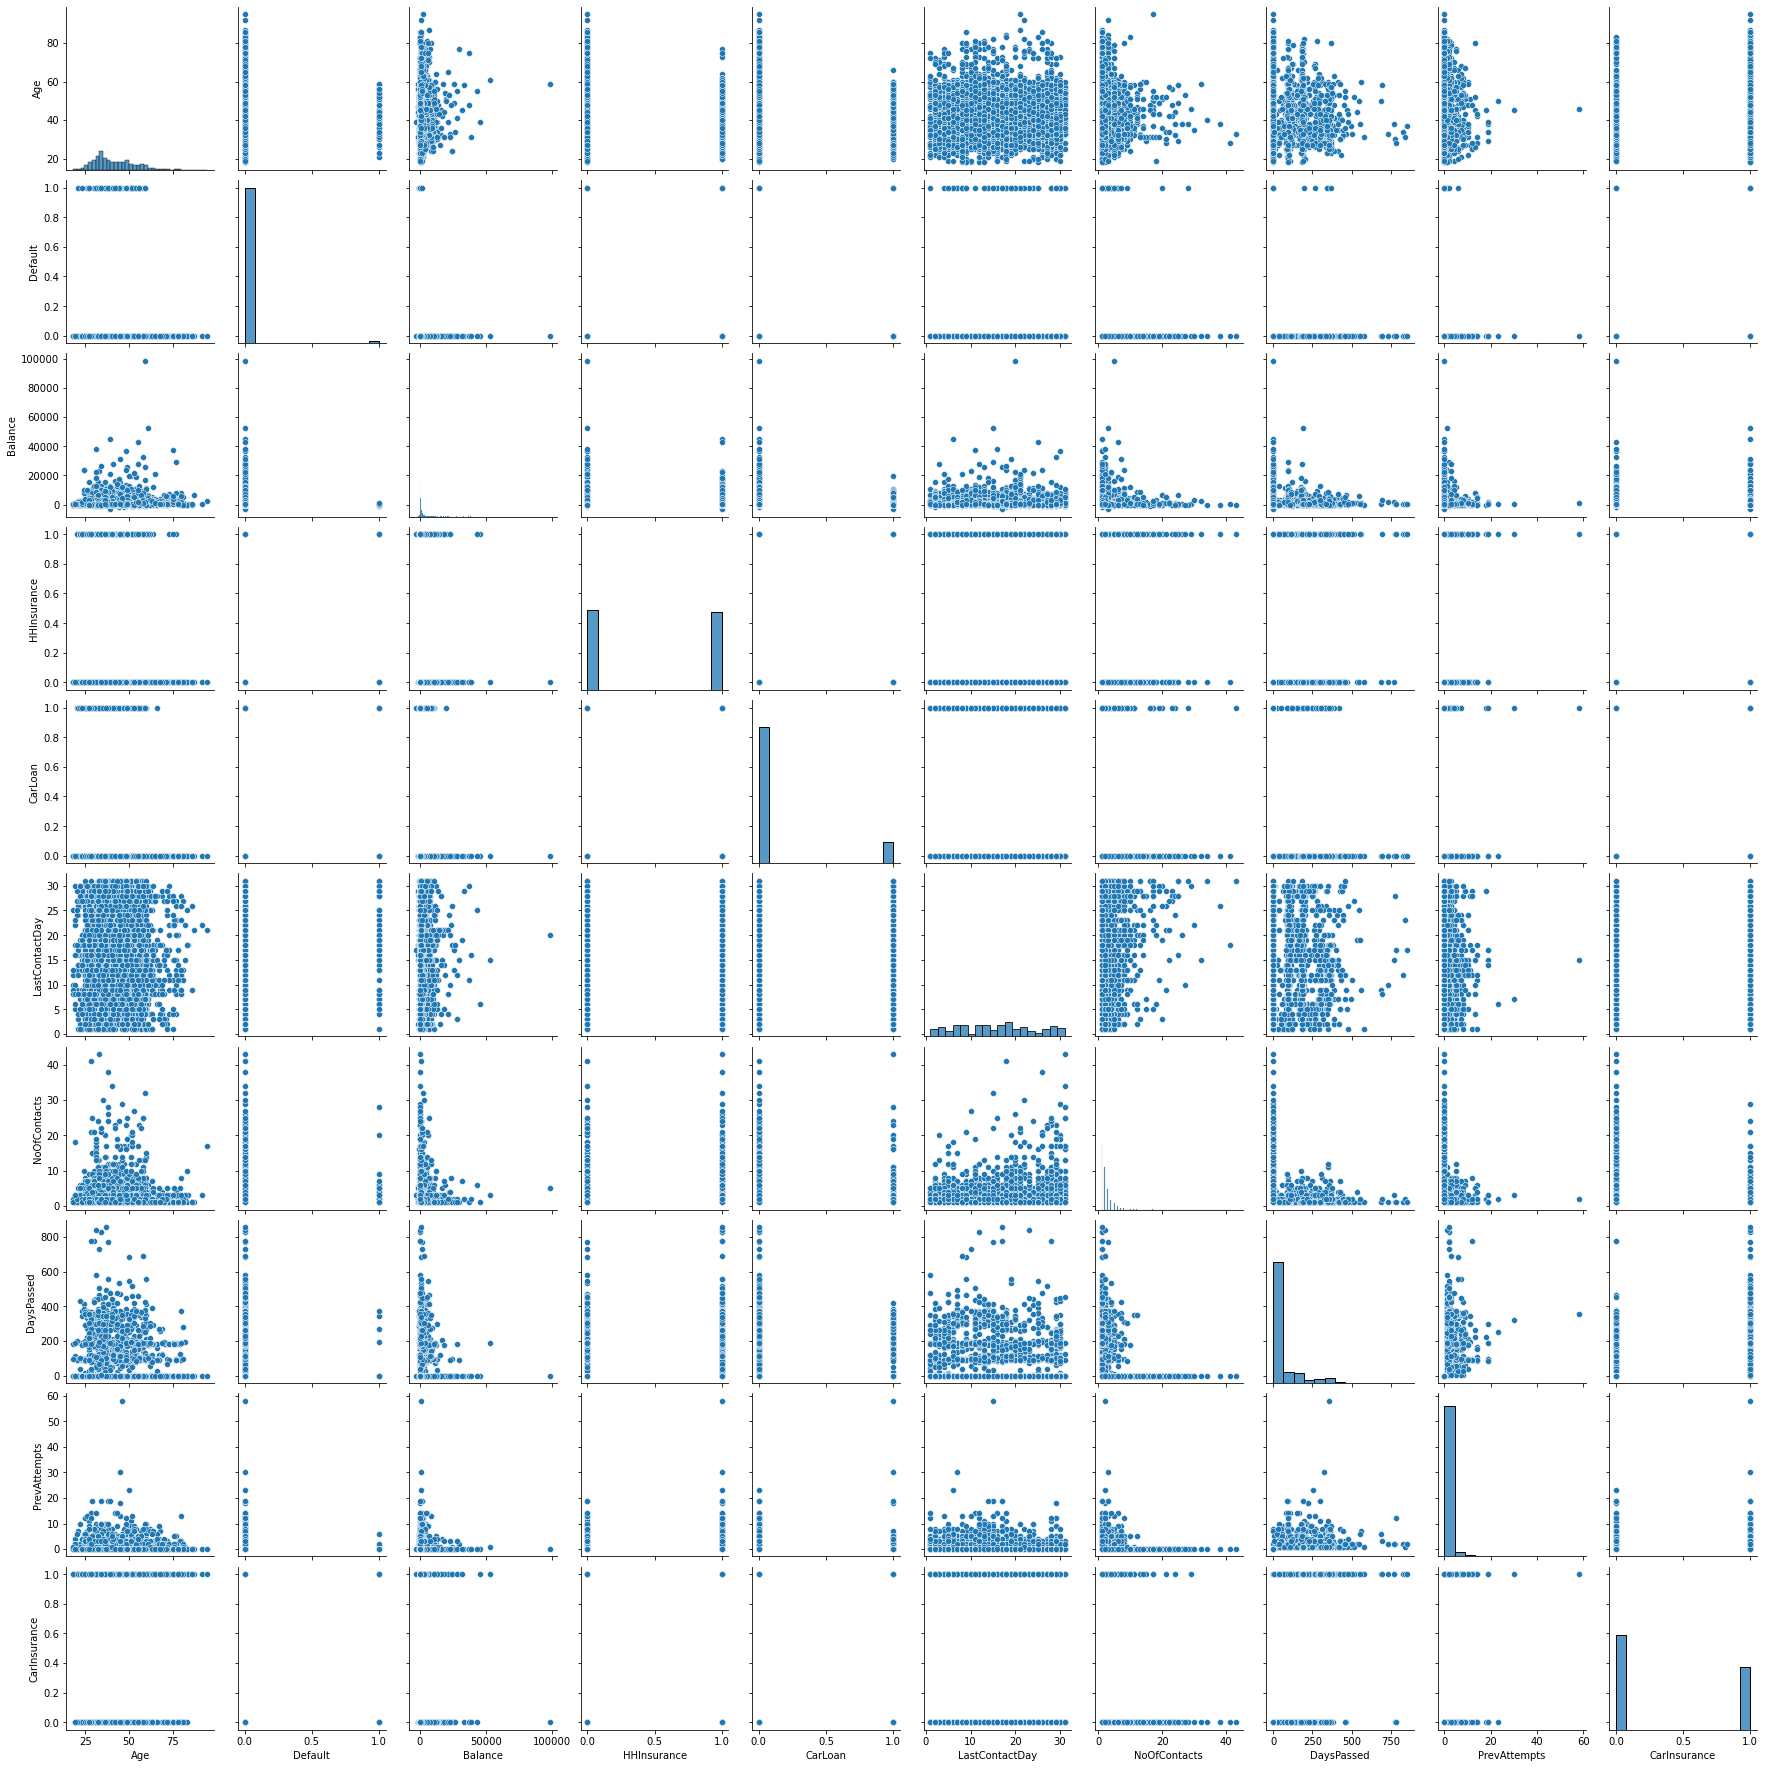

In [20]:
sns.pairplot(df)

In [21]:
df1=df.copy()
df1

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0


In [22]:
# converting object data type to datetime
df1=df1.astype({'CallStart':'datetime64[ns]','CallEnd':'datetime64[ns]'})
df1

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2023-10-12 13:45:20,2023-10-12 13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2023-10-12 14:49:03,2023-10-12 14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2023-10-12 16:30:24,2023-10-12 16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2023-10-12 12:06:43,2023-10-12 12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2023-10-12 14:35:44,2023-10-12 14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,2023-10-12 17:46:28,2023-10-12 17:50:57,1
3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,2023-10-12 14:49:16,2023-10-12 14:51:21,0
3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,2023-10-12 12:19:03,2023-10-12 12:23:53,0


In [23]:
# splitting train and test data

In [24]:
x=df.iloc[:,:17]
x.drop(columns=['CallStart','CallEnd'],inplace=True)
x

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome
Id,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure
3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN
3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN


In [25]:
y=df['CarInsurance']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)


In [27]:
x_train

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome
Id,,,,,,,,,,,,,,,
3216,31,technician,divorced,secondary,0,-1185,1,0,NaN,16,jun,5,-1,0,NaN
3127,34,technician,single,tertiary,0,228,1,0,cellular,22,jul,4,-1,0,NaN
698,47,technician,single,secondary,0,600,0,1,cellular,4,aug,2,-1,0,NaN
3614,32,admin.,single,tertiary,0,1531,1,0,cellular,15,may,1,352,5,failure
2375,40,admin.,divorced,secondary,0,2129,0,0,cellular,30,apr,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,55,NaN,married,tertiary,0,0,0,0,NaN,5,jun,1,-1,0,NaN
1295,44,technician,married,secondary,0,13761,1,0,NaN,29,may,1,-1,0,NaN
861,41,blue-collar,married,primary,0,246,0,0,NaN,19,jun,3,-1,0,NaN


In [28]:
x_test

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome
Id,,,,,,,,,,,,,,,
556,56,entrepreneur,married,tertiary,0,693,0,0,cellular,22,jul,5,-1,0,NaN
3492,39,management,married,tertiary,0,20932,0,0,cellular,21,nov,2,-1,0,NaN
528,24,management,single,tertiary,0,393,0,0,cellular,27,sep,1,-1,0,NaN
3926,39,blue-collar,divorced,secondary,0,42,1,0,NaN,6,may,2,-1,0,NaN
2990,31,services,married,secondary,0,413,1,0,NaN,13,may,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,62,retired,married,secondary,0,2917,0,0,cellular,12,apr,1,188,1,success
227,55,retired,divorced,tertiary,0,0,0,0,cellular,18,may,1,370,1,success
1613,30,blue-collar,single,secondary,0,183,1,0,cellular,18,jul,1,-1,0,NaN


In [29]:
# filling null values
x_train.isnull().sum()

Age                    0
Job                   14
Marital                0
Education            131
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        615
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             2152
dtype: int64

In [30]:
x_train['Job'].fillna(x_train['Job'].mode()[0], inplace=True)
x_train['Education'].fillna(x_train['Education'].mode()[0], inplace=True)
x_train['Communication'].fillna(x_train['Communication'].mode()[0], inplace=True)
x_train['Outcome'].fillna(x_train['Outcome'].mode()[0], inplace=True)

In [31]:
x_train.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
dtype: int64

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 3216 to 3175
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               2800 non-null   int64 
 1   Job               2800 non-null   object
 2   Marital           2800 non-null   object
 3   Education         2800 non-null   object
 4   Default           2800 non-null   int64 
 5   Balance           2800 non-null   int64 
 6   HHInsurance       2800 non-null   int64 
 7   CarLoan           2800 non-null   int64 
 8   Communication     2800 non-null   object
 9   LastContactDay    2800 non-null   int64 
 10  LastContactMonth  2800 non-null   object
 11  NoOfContacts      2800 non-null   int64 
 12  DaysPassed        2800 non-null   int64 
 13  PrevAttempts      2800 non-null   int64 
 14  Outcome           2800 non-null   object
dtypes: int64(9), object(6)
memory usage: 350.0+ KB


In [33]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

### Converting categorical in to numerical

In [34]:
# onehot
x_train=pd.get_dummies(x_train,columns=['Job','Marital','Education','Communication','LastContactMonth','Outcome'],drop_first=True)

In [35]:
x_train

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_blue-collar,...,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_other,Outcome_success
Id,,,,,,,,,,,,,,,,,,,,,
3216,31,0,-1185,1,0,16,5,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
3127,34,0,228,1,0,22,4,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
698,47,0,600,0,1,4,2,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3614,32,0,1531,1,0,15,1,352,5,0,...,0,0,0,0,1,0,0,0,0,0
2375,40,0,2129,0,0,30,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,55,0,0,0,0,5,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1295,44,0,13761,1,0,29,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
861,41,0,246,0,0,19,3,-1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
x_train.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Marital_married', 'Marital_single',
       'Education_secondary', 'Education_tertiary', 'Communication_telephone',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_other',
       'Outcome_success'],
      dtype='object')

In [37]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 3216 to 3175
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2800 non-null   int64
 1   Default                  2800 non-null   int64
 2   Balance                  2800 non-null   int64
 3   HHInsurance              2800 non-null   int64
 4   CarLoan                  2800 non-null   int64
 5   LastContactDay           2800 non-null   int64
 6   NoOfContacts             2800 non-null   int64
 7   DaysPassed               2800 non-null   int64
 8   PrevAttempts             2800 non-null   int64
 9   Job_blue-collar          2800 non-null   uint8
 10  Job_entrepreneur         2800 non-null   uint8
 11  Job_housemaid            2800 non-null   uint8
 12  Job_management           2800 non-null   uint8
 13  Job_retired              2800 non-null   uint8
 14  Job_self-employed        2800 non-null   uint8
 15  J

In [38]:
# cleaning testdata

In [39]:
x_test['Job'].fillna(x_test['Job'].mode()[0], inplace=True)
x_test['Education'].fillna(x_test['Education'].mode()[0], inplace=True)
x_test['Communication'].fillna(x_test['Communication'].mode()[0], inplace=True)
x_test['Outcome'].fillna(x_test['Outcome'].mode()[0], inplace=True)

In [40]:
# onehot
x_test=pd.get_dummies(x_test,columns=['Job','Marital','Education','Communication','LastContactMonth','Outcome'],drop_first=True)
x_test

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_blue-collar,...,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_other,Outcome_success
Id,,,,,,,,,,,,,,,,,,,,,
556,56,0,693,0,0,22,5,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
3492,39,0,20932,0,0,21,2,-1,0,0,...,0,0,0,0,0,1,0,0,0,0
528,24,0,393,0,0,27,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
3926,39,0,42,1,0,6,2,-1,0,1,...,0,0,0,0,1,0,0,0,0,0
2990,31,0,413,1,0,13,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,62,0,2917,0,0,12,1,188,1,0,...,0,0,0,0,0,0,0,0,0,1
227,55,0,0,0,0,18,1,370,1,0,...,0,0,0,0,1,0,0,0,0,1
1613,30,0,183,1,0,18,1,-1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [41]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 556 to 3849
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1200 non-null   int64
 1   Default                  1200 non-null   int64
 2   Balance                  1200 non-null   int64
 3   HHInsurance              1200 non-null   int64
 4   CarLoan                  1200 non-null   int64
 5   LastContactDay           1200 non-null   int64
 6   NoOfContacts             1200 non-null   int64
 7   DaysPassed               1200 non-null   int64
 8   PrevAttempts             1200 non-null   int64
 9   Job_blue-collar          1200 non-null   uint8
 10  Job_entrepreneur         1200 non-null   uint8
 11  Job_housemaid            1200 non-null   uint8
 12  Job_management           1200 non-null   uint8
 13  Job_retired              1200 non-null   uint8
 14  Job_self-employed        1200 non-null   uint8
 15  Jo

In [42]:
x_test.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Marital_married', 'Marital_single',
       'Education_secondary', 'Education_tertiary', 'Communication_telephone',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_other',
       'Outcome_success'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train1,columns=x_train.columns)

In [44]:
x_test1=scaler.transform(x_test)
x_test=pd.DataFrame(x_test1,columns=x_test.columns)

# model creating

### Logistic Regression

In [45]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred_tr=LR.predict(x_train)
y_pred_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
accuracy=accuracy_score(y_pred_tr,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7153571428571428


In [48]:
y_pred_ts=LR.predict(x_test)
y_pred_ts

accuracy=accuracy_score(y_pred_ts,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7191666666666666


### SVM Classifier

In [49]:
SVM = svm.SVC()
SVM.fit(x_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(x_test)))

SVM Accuracy is 0.72


### Decision Tree Classifier

In [50]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(x_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(x_test)))

Decision Tree Accuracy is 0.64


### Random Forest Classifier

In [51]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(x_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(x_test)))

Random Forest Accuracy is 0.72


In [52]:
# Crossvalidation on RandomForest
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 10],'max_depth': [5, 6, 7], 'n_estimators':np.arange(100,600,200)}

In [53]:
GridSearch = GridSearchCV(estimator = rfc, param_grid= param_grid, cv=3, n_jobs = 2 )
GridSearch.fit(x_train, y_train)
y_pred_rfc = GridSearch.predict(x_test)

In [54]:
print("Best Parameters:",GridSearch.best_params_)
print("Train Score:",GridSearch.best_score_)
print("Test Score:",GridSearch.score(x_test,y_test))

Best Parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Train Score: 0.7207124294161344
Test Score: 0.7125


In [55]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, min_samples_split=10,class_weight="balanced")
rfc.fit(x_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(x_test)))

Random Forest Accuracy is 0.71


### AdaBoost Classifier

In [56]:
ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
ada.fit(x_train,y_train)
print ("AdaBoost Accuracy = %2.2f" % accuracy_score(y_test,ada.predict(x_test)))

AdaBoost Accuracy = 0.72


### Gradient Boost Classifier

In [57]:
gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
gb.fit(x_train,y_train)
print ("GradientBoost Accuracy = %2.2f" % accuracy_score(y_test,gb.predict(x_test)))

GradientBoost Accuracy = 0.72


### XG Boost Classifier

In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
xg_cls = xgb.XGBClassifier(n_estimators=1000, random_state=42)
xg_cls.fit(x_train, y_train)
print ("XGBoost Accuracy = %2.2f" % accuracy_score(y_test,xg_cls.predict(x_test)))

XGBoost Accuracy = 0.67


In [59]:
# Crossvalidation on XGBoost
param_grid = {'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7], 'n_estimators':np.arange(100,500,100)}

In [60]:
GridSearch = GridSearchCV(estimator = xg_cls, param_grid= param_grid, cv=3, n_jobs = 2 )
GridSearch.fit(x_train, y_train)
y_pred_xgcv = GridSearch.predict(x_test)

In [61]:
print("Best Parameters:",GridSearch.best_params_)
print("Train Score:",GridSearch.best_score_)
print("Test Score:",GridSearch.score(x_test,y_test))

Best Parameters: {'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 200}
Train Score: 0.7260699561559535
Test Score: 0.7158333333333333


In [62]:
xg_cls = xgb.XGBClassifier(n_estimators=200, random_state=42,learning_rate = 0.03, max_depth = 7)
xg_cls.fit(x_train, y_train)
print ("XGBoost Accuracy after cross validation = %2.2f" % accuracy_score(y_test,xg_cls.predict(x_test)))

XGBoost Accuracy after cross validation = 0.72


Here we are getting same accuracy for most of the models

## Recommandations


**1. Train the employees working in the Call Center with people skills so that during call they can be more friendly and engaging**

**2. Maintain a tracker which reminds of follow-ups so that the representative can talk to the person again and try to convince
them in purchasing Car Insurance**

**3. Select people having good credit score and account balance so that the time invested in them is useful**

**4. Concentrate on Older People with age above 40 because compromising them for a new plan is easy as per the previous data**

**5. Contact persons from the previous campaign who responded since they are more likely to buy Insurance**
